<a href="https://colab.research.google.com/github/bdbejarc/Instrumentos-Opticos/blob/main/Entrega_01/Entrega_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 4

In [5]:
import pandas as pd
import matplotlib as mlt
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PyQt5

In [72]:
# Para que las gráficas se impriman no en el notebook, sino en una nueva pestaña

# Cuando se trabaja en GUI propia de computador
# %matplotlib qt   


#Cuando se trabaja en jupyter o en colab
from google.colab.patches import cv2_imshow 

## Punto 4 a

In [ ]:
# Lectura de los datos

a = pd.read_csv('a.csv', header=None)              # Lecutra del .csv como un objeto np.array

# Dado que la información del csv se carga como texto y además los complejos tienen i en vez de j
# se convertirán esos textos a números complejos
a = a.applymap(lambda s: complex(s.replace('i', 'j'))).values       # Tomado de https://stackoverflow.com/questions/18280489/numpy-read-csv-with-complex-number

# Nueva sección

In [81]:
# Función para plotear complejos

def fun_ploteo_complejo(mat, indicador, escala, mapa_color = 'gray', entorno = 'casa'):
    '''
    mat  es una matriz compleja a plotear
    indicador = I para intensidad, A para amplitud, P para fase
    escala = 1 para nada, 0 para logarítmica
    '''
    if(indicador =="I"):
        mat = np.abs(mat)**2
    elif(indicador == "A"):
        mat = np.abs(mat)
    elif(indicador == "P"):
        mat = np.angle(mat)

#Cuando trabajamos en GUI propia
    if( entorno == 'casa'):
      if (escala == 1):
        plt.figure()
        plt.imshow(mat, cmap = mapa_color)
        plt.colorbar()
        plt.show()
      else:    
        plt.figure()
        plt.imshow( np.log( mat + 0.001), cmap = mapa_color)
        plt.colorbar()
        plt.show()

# Trabajando online Jupyter o colab
    if(entorno == 'GUI'):
      if (escala == 1):
        cv2_imshow(mat)
      else:
        cv2_imshow(np.log( mat + 0.001))




#cv2_imshow(gray_img_gu)

In [ ]:
fun_ploteo_complejo(a,"A", 0)

# Se puede apreciar que en ese campo no hay una imagen discernible

In [ ]:
# Por lo que podemos observar como se 
fun_ploteo_complejo(a,"P", 1)

# Se puede apreciar un patrón en en el centro como dos semiesferas

In [ ]:
np.imag(a[0][0])
print(np.angle(a[0][0]), np.sqrt(np.real(a[0][0])**2 + np.imag(a[0][0])**2), np.abs(a[0][0]), np.tan(np.imag(a[0][0])/np.real(a[0][0]) ) )

-0.4619989196455577 0.9999999999999996 0.9999999999999996 -0.5436317736040365


In [ ]:
#Creación de la máscara

mask_4a = np.zeros(np.shape(a), dtype = "uint8") # uint8 tipo de la variable de la matriz (enteros de 8 bit)

# Como mi imagen no es cuadrada, entonces necesito dos coordenadas
# para el centro
coord0 = int(np.shape(a)[0]/2)
coord1 = int(np.shape(a)[1]/2)

print(coord0, coord1)

#Graficar la máscara circular 
cv2.circle(mask_4a, (coord1, coord0), 50, 1, -1)
#arg1  #arg2 = posiciones de columnas #arg 3=pixeles dentro de la máscara # arg4 = que me rellene todo
plt.figure()
plt.imshow(mask_4a)
plt.colorbar() # Para mostrar barra de colores
plt.show()

360 360


In [ ]:
#Transformada de la matriz a
fft_a = np.fft.fftn(a)

# Shifteada
fft_a_shifted = np.fft.fftshift(fft_a)

# Aplicando la máscara (en el espacio de frecuencias)
fft_a_filtrada = fft_a_shifted*mask_4a

# Regresando al espacio real aplicando la máscara
a_filtrada = np.fft.ifftn(fft_a_filtrada)

# Gráfica de la máscara
fun_ploteo_complejo(mask_4a, "A", 0)

# Gráfica de la transformada shifteada
fun_ploteo_complejo(fft_a_shifted, "A", 0)
#Grágica de la fase de la transformada
fun_ploteo_complejo(fft_a_shifted, "P", 1, 'viridis')


# Gráfica de la transformada * máscara
fun_ploteo_complejo(fft_a_filtrada, "A", 0)

# Gráfica de la imagen real despues de filtrar la transformada con la máscara
fun_ploteo_complejo(a_filtrada, "A", 1)


In [ ]:


plt.figure()
plt.hist(np.real(a))
plt.show()


plt.figure()
plt.hist(np.imag(a))
plt.show()


plt.figure()
plt.hist(np.abs(a))
plt.show()

plt.figure()
plt.hist(np.angle(a))
plt.show()

In [ ]:
plt.hist(np.abs(a))

(array([[ 16.,   0.,  58., ..., 130., 200.,  82.],
        [ 13.,   3.,  61., ..., 131., 198.,  72.],
        [ 17.,   0.,  40., ..., 139., 180.,  73.],
        ...,
        [  9.,   3.,  56., ..., 146., 181.,  82.],
        [ 10.,   3.,  54., ..., 140., 191.,  71.],
        [  6.,   8.,  46., ..., 141., 193.,  75.]]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 <a list of 720 BarContainer objects>)

In [ ]:
plt.hist(np.angle(a))

(array([[  5.,  27., 172., ...,   0.,   0.,  13.],
        [  6.,  21., 185., ...,   1.,   1.,  11.],
        [ 11.,  24., 191., ...,   0.,   0.,  11.],
        ...,
        [ 16.,  14.,  90., ...,   1.,   0.,   0.],
        [ 17.,  15.,  86., ...,   3.,   0.,   0.],
        [ 16.,  18.,  96., ...,   3.,   0.,   0.]]),
 array([-1.57079633, -1.25663706, -0.9424778 , -0.62831853, -0.31415927,
         0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
         1.57079633]),
 <a list of 720 BarContainer objects>)

# Punto 4 c

(1680, 2600) (64, 64) [1616 2536]


TypeError: ignored

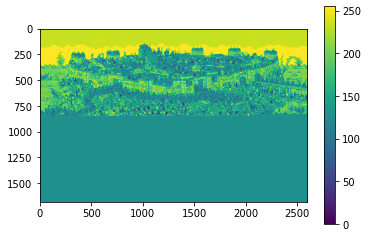

In [74]:
img_gu = cv2.imread("//c.jpeg")
img_waly=cv2.imread("/c_clue.jpeg")


gray_img_gu = cv2.cvtColor(img_gu, cv2.COLOR_BGR2GRAY)
gray_img_waly = cv2.cvtColor(img_waly, cv2.COLOR_BGR2GRAY)


plt.imshow(gray_img_gu)

#plt.imshow(gray_img_waly)
plt.colorbar()

print(np.shape(gray_img_gu), np.shape(gray_img_waly), np.array(np.shape(gray_img_gu) )-np.array(np.shape(gray_img_waly) ) )

cv2_imshow(gray_img_gu)

In [48]:
dimension_pad = (np.array(np.shape(gray_img_gu) ) - np.array(np.shape(gray_img_waly) ) ) /2 
gray_waly_paded = np.pad(gray_img_waly, ( (np.int(dimension_pad[0]),np.int(dimension_pad[0]) ), (np.int(dimension_pad[1]), np.int(dimension_pad[1]) ) ), mode = 'constant', constant_values=(0, 0) )
#dimension_pad

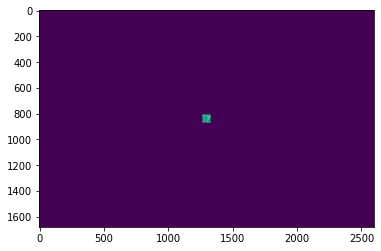

In [50]:
np.shape(gray_waly_paded)
plt.imshow(gray_waly_paded)

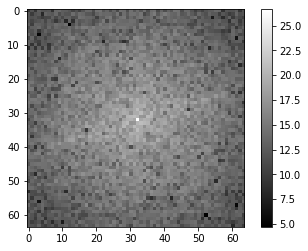

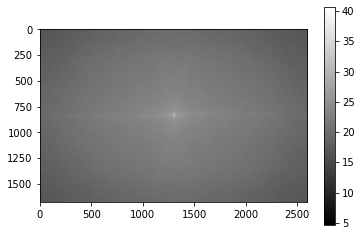

In [58]:
fft_gray_waly = np.fft.fftn(gray_img_waly)
ffts_gray_waly = np.fft.fftshift(fft_gray_waly)

fft_gray_gu = np.fft.fftn(gray_img_gu)
ffts_gray_gu = np.fft.fftshift(fft_gray_gu)

fun_ploteo_complejo(ffts_gray_waly, "I", 0)
fun_ploteo_complejo(ffts_gray_gu, "I", 0)

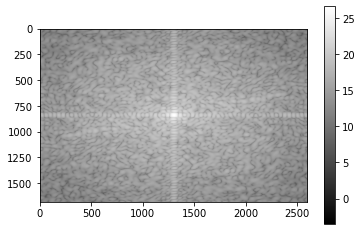

In [88]:
#graficando fft de waly padeado, mas no, el pad de fft de waly
fft_pad_gray_waly = np.fft.fftn(gray_waly_paded)
fft_pad_gray_waly = np.fft.fftshift(fft_pad_gray_waly)

fun_ploteo_complejo(fft_pad_gray_waly, "I", 0)


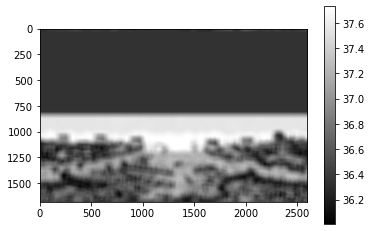

In [89]:
fft_pad_mult = pad_ffts_gray_waly*ffts_gray_gu
img_gu_filtrada_pad = np.fft.ifftn(fft_pad_mult)

fun_ploteo_complejo(img_gu_filtrada_pad, "I", 0, entorno='casa')

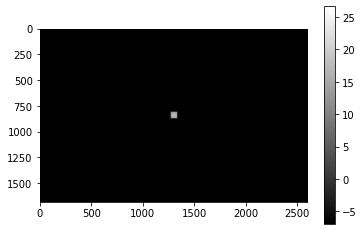

In [100]:
ffts_pad_gray_waly = np.pad(ffts_gray_waly, ( (np.int(dimension_pad[0]),np.int(dimension_pad[0]) ), (np.int(dimension_pad[1]), np.int(dimension_pad[1]) ) ), mode = 'constant', constant_values=(0, 0) )
fun_ploteo_complejo(ffts_pad_gray_waly, "I", 0)

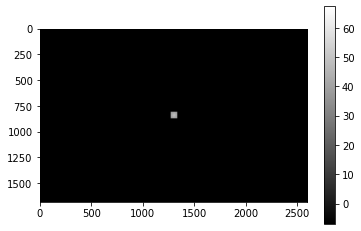

In [101]:
mult2= ffts_pad_gray_waly*ffts_gray_gu
fun_ploteo_complejo(mult2, "I", 0)

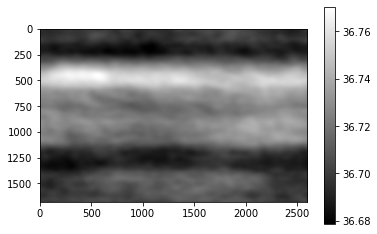

In [104]:
fun_ploteo_complejo(np.fft.ifftn(mult2), "I", 0)